In [1]:
import numpy as np
import simpleaudio as sa

frequency = 440  # Our played note will be 440 Hz
fs = 44100  # 44100 samples per second
seconds = 3  # Note duration of 3 seconds

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs, False)

# Generate a 440 Hz sine wave
note = np.sin(frequency * t * 2 * np.pi)

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
# Convert to 16-bit data
audio = audio.astype(np.int16)

# Start playback
play_obj = sa.play_buffer(audio, 1, 2, fs)

# Wait for playback to finish before exiting
play_obj.wait_done()

## Recording and Playing Audio

In [136]:
# Imports
import soundfile as sf
import sounddevice as sd
from scipy.io.wavfile import write

# Parameters
fs = 44100  # Sample rate
seconds = 3  # Duration of recording
filename = 'output.wav'

# Record
data = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished

# Save as WAV file
write(filename, fs, myrecording)   

# # Extract data and sampling rate from WAV file
# data, fs = sf.read(filename, dtype='float32')  

In [171]:
# Play
import numpy as np

def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))

# sd.play(2*(np.exp(data)/2-0.5), fs)

# sd.play(5*(data / (np.linalg.norm(data) + 1e-16) -1), fs)
# sd.play(sigmoid(data), fs)
sd.play(data, fs)
status = sd.wait()  # Wait until file is done playing

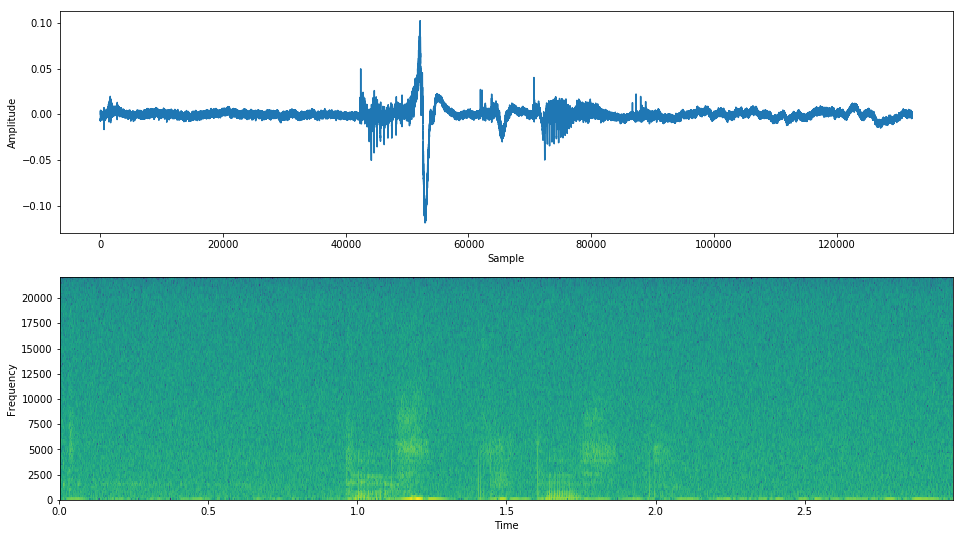

In [158]:
%matplotlib inline
# import the libraries

import matplotlib.pyplot as plt
import numpy as np
 
# Sampling Frequency
samplingFrequency = fs
 
# Plot the signal
plt.figure(figsize=(16,9))
plt.subplot(211)
plt.plot(np.exp(data)/2-0.5)
# plt.plot(data)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot the spectrogram

plt.subplot(212)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(data[:,0] , Fs=samplingFrequency)
plt.xlabel('Time')
plt.ylabel('Frequency') 

plt.show()   

## Sound real-time analysis

In [8]:
import pyaudio
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
import time
from tkinter import TclError
from scipy.fftpack import fft

# use this backend to display in separate Tk window
%matplotlib tk

# constants
CHUNK = 1024 * 1             # samples per frame
FORMAT = pyaudio.paInt16     # audio format (bytes per sample?)
CHANNELS = 1                 # single channel for microphone
RATE = 44100                 # samples per second

In [9]:
# create matplotlib figure and axes
fig, (ax1, ax2) = plt.subplots(2, figsize=(15, 7))
# fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 7))

# pyaudio class instance
p = pyaudio.PyAudio()

# stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

# variable for plotting
x = np.arange(0, 2 * CHUNK, 2)       # samples (waveform)
xf = np.linspace(0, RATE, CHUNK)     # frequencies (spectrum)

# create a line object with random data
line, = ax1.plot(x, np.random.rand(CHUNK), 'g-', lw=2)

# create semilogx line for spectrum
line_fft, = ax2.semilogx(xf, np.random.rand(CHUNK), 'm-', lw=2)

# create semilogx line for spectrum2
# line_fft, = ax2.semilogx(xf2, np.random.rand(CHUNK), 'm-', lw=2)
# powerSpectrum, freqenciesFound, time_, imageAxis = ax3.specgram(x , Fs=RATE)

# format waveform axes
ax1.set_title('AUDIO WAVEFORM')
ax1.set_xlabel('samples')
ax1.set_ylabel('volume')
ax1.set_ylim(0, 255)
# ax1.set_ylim(-55, 305)
ax1.set_xlim(0, 2 * CHUNK)
plt.setp(ax1, xticks=[0, CHUNK, 2 * CHUNK], yticks=[0, 128, 255])

# format spectrum axes
ax2.set_xlim(20, RATE / 2)

# format spectrum 2 axes

# ax3.set_xlabel('Time')
# ax3.set_ylabel('Frequency') 

print('stream started')

# for measuring frame rate
frame_count = 0
start_time = time.time()

while True:
    
    # binary data
    data = stream.read(CHUNK)  
    
    # convert data to integers, make np array, then offset it by 127
    data_int = struct.unpack(str(2 * CHUNK) + 'B', data)
    
    # create np array and offset by 128
    data_np = np.array(data_int, dtype='b')[::2] + 128
    
    line.set_ydata(data_np)
    
    # compute FFT and update line
    yf = fft(data_int)
    line_fft.set_ydata(np.abs(yf[0:CHUNK])  / (128 * CHUNK))
    
#     powerSpectrum, freqenciesFound, time_, imageAxis = ax3.specgram(data_int , Fs=RATE)
    
    # update figure canvas
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
        frame_count += 1
        
    except TclError:
        
        # calculate average frame rate
        frame_rate = frame_count / (time.time() - start_time)
        
        print('stream stopped')
        print('average frame rate = {:.0f} FPS'.format(frame_rate))
        break

stream started
stream stopped
average frame rate = 25 FPS


## Speech synthesis
https://pypi.org/project/pyttsx3/

In [13]:
import pyttsx3
engine = pyttsx3.init() # object creation

""" RATE"""
rate = 150
print (rate)                        #printing current voice rate
engine.setProperty('rate', rate)     # setting up new voice rate
# rate = engine.getProperty('rate')   # getting details of current speaking rate


"""VOLUME"""
volume = engine.getProperty('volume')   #getting to know current volume level (min=0 and max=1)
print (volume)                          #printing current volume level
engine.setProperty('volume',1.0)    # setting up volume level  between 0 and 1

"""VOICE"""
voices = engine.getProperty('voices')       #getting details of current voice
#engine.setProperty('voice', voices[0].id)  #changing index, changes voices. o for male
engine.setProperty('voice', voices[1].id)   #changing index, changes voices. 1 for female

engine.say('My current speaking rate is ' + str(rate)+ ', your bunny wrote')
engine.save_to_file("your bunny wrote", 'D:\Projects\sound-analysis\temp2.mp3', 'your bunny wrote')

engine.runAndWait()
engine.stop()

150
1.0


In [114]:
data, fs = sf.read('output.wav', dtype='float32')  
sd.play(data, fs)
status = sd.wait()  # Wait until file is done playing

In [36]:
from gtts import gTTS
tts = gTTS('hello')
tts.save('temp1.mp3')

## Autoencoder

In [ ]:
import os

import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image

if not os.path.exists('./mlp_img'):
    os.mkdir('./mlp_img')


def to_img(x):
    x = x.view(x.size(0), 1, 28, 28)
    return x

num_epochs = 200
batch_size = 128
learning_rate = 1e-3


def plot_sample_img(img, name):
    img = img.view(1, 28, 28)
    save_image(img, './sample_{}.png'.format(name))


def min_max_normalization(tensor, min_value, max_value):
    min_tensor = tensor.min()
    tensor = (tensor - min_tensor)
    max_tensor = tensor.max()
    tensor = tensor / max_tensor
    tensor = tensor * (max_value - min_value) + min_value
    return tensor


def tensor_round(tensor):
    return torch.round(tensor)


img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda tensor:min_max_normalization(tensor, 0, 1)),
    transforms.Lambda(lambda tensor:tensor_round(tensor))
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


class VariationalAutoencoder(nn.Module):
    def __init__(self):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 400),
            nn.ReLU(True),
            nn.Linear(400, 40))
        self.decoder = nn.Sequential(
            nn.Linear(20, 400),
            nn.ReLU(True),
            nn.Linear(400, 28 * 28),
            nn.Sigmoid())

    def reparametrize(self, mu, logvar):
        var = logvar.exp()
        std = var.sqrt()
        eps = Variable(torch.cuda.FloatTensor(std.size()).normal_())
        return eps.mul(std).add(mu)

    def forward(self, x):
        h = self.encoder(x)
        mu = h[:, :20]
        logvar = h[:, 20:]
        z = self.reparametrize(mu, logvar)
        x_hat = self.decoder(z)
        return x_hat, mu, logvar

    def generation_with_interpolation(self, x_one, x_two, alpha):
        hidden_one = self.encoder(x_one)
        hidden_two = self.encoder(x_two)
        mu_one = hidden_one[:, :20]
        logvar_one = hidden_one[:, 20:]
        mu_two = hidden_two[:, :20]
        logvar_two = hidden_two[:, 20:]
        mu = (1 - alpha) * mu_one + alpha * mu_two
        logvar = (1 - alpha) * logvar_one + alpha * logvar_two
        z = self.reparametrize(mu, logvar)
        generated_image = self.decoder(z)
        return generated_image

model = VariationalAutoencoder().cuda()
BCE = nn.BCELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img).cuda()
        # ===================forward=====================
        x_hat, mu, logvar = model(img)
        NKLD = mu.pow(2).add(logvar.exp()).mul(-1).add(logvar.add(1))
        KLD = torch.sum(NKLD).mul(-0.5)
        KLD /= 128 * 784
        loss = BCE(x_hat, img) + KLD
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.data[0]))
    if epoch % 10 == 0:
        x = to_img(img.cpu().data)
        x_hat = to_img(x_hat.cpu().data)
        save_image(x, './mlp_img/x_{}.png'.format(epoch))
        save_image(x_hat, './mlp_img/x_hat_{}.png'.format(epoch))
        batch = iter(dataloader).next()[0]
        batch = batch.view(batch.size(0), -1)
        batch = Variable(batch).cuda()
        x_one = batch[0:1]
        x_two = batch[1:2]
        generated_images = []
        for alpha in torch.arange(0.0, 1.0, 0.1):
            generated_images.append(model.generation_with_interpolation(
                x_one, x_two, alpha))
        generated_images = torch.cat(generated_images, 0).cpu().data
        save_image(generated_images.view(-1, 1, 28, 28),
                   './generated/output_interpolate_{}.png'.format(epoch),
                   nrow=1)
torch.save(model.state_dict(), './sim_variational_autoencoder.pth')